In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("admitted.csv")
data.head()

,first exam,second exam,is admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
from sklearn.linear_model import LogisticRegression
X = data.iloc[:, :-1]   
y = data.iloc[:, -1]
clf = LogisticRegression(random_state=0, penalty='none').fit(X, y)
data['prob'] = [i[1] for i in clf.predict_proba(X)]
data.head() 

,first exam,second exam,is admitted,prob
0,34.623660,78.024693,0,0.091033
1,30.286711,43.894998,0,0.000042
2,35.847409,72.902198,0,0.043908
3,60.182599,86.308552,1,0.990425
4,79.032736,75.344376,1,0.998199


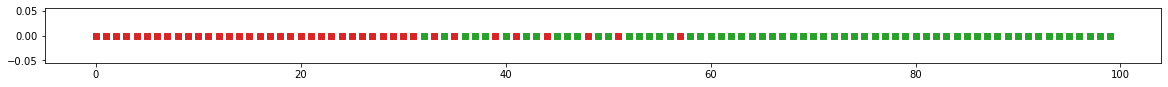

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 1))
sorted_data = data.sort_values('prob').reset_index()
plt.scatter(range(100), [0] * 100, marker='s',
            c=['tab:green' if res == 1 else 'tab:red' for res in sorted_data['is admitted']])

In [49]:
def precision(df, threshold):
    TP = df[(df.index > threshold) & (df['is admitted'] == 1)]
    FP = df[(df.index > threshold) & (df['is admitted'] == 0)]
    #print(len(TP))
    #print(len(FP))
    return len(TP) / (len(TP) + len(FP))

def recall(df, threshold):
    TP = df[(df.index > threshold) & (df['is admitted'] == 1)]
    FN = df[(df.index <= threshold) & (df['is admitted'] == 1)]
    #print(len(TP))
    #print(len(FN))
    return len(TP) / (len(TP) + len(FN))

def f_score(df, threshold):
    _precision = precision(df, threshold)
    _recall = recall(df, threshold)
    return 2 * _precision * _recall / (_precision + _recall)

def f_score_beta(df, threshold, beta=1):
    _precision = precision(df, threshold)
    _recall = recall(df, threshold)  
    return (1 + beta ** 2) * _precision * _recall / (_precision * beta ** 2 + _recall)

def multiplication(rec, prec):
    return rec * prec

In [54]:
maxx = 0
for i in range(99):
    thr = i
    res = multiplication(precision(sorted_data, thr), recall(sorted_data, thr))
    if res > maxx:
        maxx = res
    print(thr, res)
    
print(maxx)#threshold with mAXIMUM IS 31

0 0.6060606060606061
1 0.6122448979591837
2 0.6185567010309279
3 0.625
4 0.631578947368421
5 0.6382978723404256
6 0.6451612903225806
7 0.6521739130434783
8 0.6593406593406593
9 0.6666666666666666
10 0.6741573033707865
11 0.6818181818181818
12 0.6896551724137931
13 0.6976744186046512
14 0.7058823529411765
15 0.7142857142857143
16 0.7228915662650602
17 0.7317073170731707
18 0.7407407407407407
19 0.75
20 0.759493670886076
21 0.7692307692307693
22 0.7792207792207793
23 0.7894736842105263
24 0.8
25 0.8108108108108109
26 0.821917808219178
27 0.8333333333333334
28 0.8450704225352113
29 0.8571428571428571
30 0.8695652173913043
31 0.8823529411764706
32 0.8659203980099502
33 0.879040404040404
34 0.8625641025641027
35 0.8760416666666667
36 0.8595238095238095
37 0.843010752688172
38 0.8265027322404371
39 0.8402777777777777
40 0.823728813559322
41 0.8379310344827586
42 0.821345029239766
43 0.8047619047619048
44 0.8193939393939395
45 0.8027777777777777
46 0.7861635220125787
47 0.769551282051282
48 0

In [56]:
maxx = 0
for i in range(99):
    thr = i
    res = f_score_beta(sorted_data, thr, beta=2)
    if res > maxx:
        maxx = res
    print(thr, res)
    
print(maxx)#threshold is 31 because of beta=2 and recall is in 2 times more important than precicion

0 0.8849557522123893
1 0.8875739644970415
2 0.8902077151335311
3 0.8928571428571429
4 0.8955223880597015
5 0.8982035928143712
6 0.9009009009009009
7 0.9036144578313253
8 0.9063444108761329
9 0.9090909090909091
10 0.9118541033434651
11 0.9146341463414633
12 0.9174311926605505
13 0.9202453987730062
14 0.9230769230769231
15 0.9259259259259259
16 0.9287925696594428
17 0.9316770186335404
18 0.9345794392523363
19 0.9375
20 0.9404388714733543
21 0.9433962264150945
22 0.9463722397476341
23 0.949367088607595
24 0.9523809523809523
25 0.9554140127388534
26 0.9584664536741213
27 0.9615384615384615
28 0.9646302250803858
29 0.9677419354838709
30 0.970873786407767
31 0.9740259740259741
32 0.9609120521172638
33 0.9640522875816994
34 0.9508196721311475
35 0.9539473684210525
36 0.9405940594059407
37 0.9271523178807948
38 0.9136212624584718
39 0.9166666666666666
40 0.9030100334448161
41 0.9060402684563758
42 0.8922558922558921
43 0.8783783783783786
44 0.8813559322033899
45 0.8673469387755104
46 0.8532423

In [57]:
maxx = 0
for i in range(99):
    thr = i
    res = f_score_beta(sorted_data, thr, beta=5)
    if res > maxx:
        maxx = res
    print(thr, res)
    
print(maxx)#threshold is 31 because beta=5 and recall is in 5 times more important than precicion

0 0.975609756097561
1 0.9762202753441802
2 0.9768315591734501
3 0.9774436090225563
4 0.9780564263322882
5 0.9786700125470515
6 0.9792843691148776
7 0.9798994974874371
8 0.9805153991200504
9 0.9811320754716982
10 0.9817495280050345
11 0.9823677581863981
12 0.9829867674858224
13 0.9836065573770493
14 0.9842271293375395
15 0.9848484848484849
16 0.9854706253948199
17 0.9860935524652338
18 0.9867172675521821
19 0.9873417721518988
20 0.9879670677644079
21 0.988593155893536
22 0.9892200380469245
23 0.9898477157360407
24 0.9904761904761905
25 0.9911054637865311
26 0.9917355371900827
27 0.9923664122137404
28 0.9929980903882878
29 0.9936305732484076
30 0.994263862332696
31 0.9948979591836735
32 0.9789406509253349
33 0.9795657726692208
34 0.9635782747603835
35 0.9641943734015346
36 0.9481765834932822
37 0.9321382842509603
38 0.9160794362588084
39 0.9166666666666666
40 0.900577293136626
41 0.9011553273427473
42 0.8850353243416827
43 0.8688946015424164
44 0.8694533762057878
45 0.8532818532818531
46

In [58]:
maxx = 0
for i in range(99):
    thr = i
    res = f_score_beta(sorted_data, thr, beta=10)
    if res > maxx:
        maxx = res
    print(thr, res)
    
print(maxx)#threshold is 31 again because beta=10 and recall is in 10 times more important than precicion

0 0.9936055090998523
1 0.9937684486716957
2 0.9939314416926358
3 0.9940944881889764
4 0.9942575881870384
5 0.9944207417131605
6 0.9945839487936976
7 0.994747209455023
8 0.9949105237235267
9 0.9950738916256159
10 0.9952373131877154
11 0.9954007884362681
12 0.9955643173977329
13 0.9957279000985871
14 0.9958915365653246
15 0.9960552268244575
16 0.9962189709025152
17 0.9963827688260442
18 0.9965466206216081
19 0.9967105263157895
20 0.9968744859351867
21 0.9970384995064164
22 0.9972025670561132
23 0.9973666886109284
24 0.997530864197531
25 0.997695093842608
26 0.9978593775728636
27 0.9980237154150197
28 0.9981881073958162
29 0.9983525535420099
30 0.9985170538803756
31 0.9986816084377059
32 0.9821987802867974
33 0.9823606989779096
34 0.9658697444352843
35 0.9660290237467019
36 0.9495299356754081
37 0.9330254041570439
38 0.9165154264972777
39 0.9166666666666666
40 0.900148539362931
41 0.900297127764939
42 0.8837708436519728
43 0.8672391017173052
44 0.8673823286540049
45 0.8508424182358771
46 

In [60]:
maxx = 0
for i in range(99):
    thr = i
    res = f_score_beta(sorted_data, thr, beta=0.7)
    if res > maxx:
        maxx = res
    print(thr, res)
    
print(maxx)#threshold is 35 ,  because beta=0.7 and recall is in 0.7 times less important than precicion

0 0.6962616822429908
1 0.7017268445839875
2 0.7072784810126582
3 0.7129186602870814
4 0.7186495176848876
5 0.7244732576985414
6 0.7303921568627451
7 0.7364085667215816
8 0.7425249169435216
9 0.7487437185929648
10 0.7550675675675677
11 0.7614991482112436
12 0.7680412371134021
13 0.7746967071057191
14 0.7814685314685315
15 0.7883597883597883
16 0.795373665480427
17 0.8025134649910235
18 0.8097826086956521
19 0.8171846435100548
20 0.8247232472324724
21 0.8324022346368716
22 0.8402255639097744
23 0.8481973434535104
24 0.8563218390804598
25 0.8646034816247583
26 0.873046875
27 0.8816568047337279
28 0.8904382470119522
29 0.8993963782696177
30 0.9085365853658536
31 0.9178644763860371
32 0.9119294605809128
33 0.9214884696016771
34 0.9154661016949153
35 0.9252676659528908
36 0.9191558441558441
37 0.9129102844638948
38 0.9065265486725664
39 0.9166666666666666
40 0.9101809954751132
41 0.9205949656750572
42 0.9140046296296297
43 0.9072599531615926
44 0.9180094786729857
45 0.9111510791366906
46 0.9

In [59]:
maxx = 0
for i in range(99):
    thr = i
    res = f_score_beta(sorted_data, thr, beta=0.5)
    if res > maxx:
        maxx = res
    print(thr, res)
    
print(maxx)#threshold is 51 ,  because beta=0.5 and recall is in 0.5 times less important than precicion, so it is the middle

0 0.6578947368421052
1 0.6637168141592921
2 0.6696428571428572
3 0.6756756756756757
4 0.6818181818181818
5 0.6880733944954128
6 0.6944444444444443
7 0.7009345794392524
8 0.7075471698113207
9 0.7142857142857142
10 0.7211538461538461
11 0.7281553398058251
12 0.7352941176470588
13 0.7425742574257426
14 0.75
15 0.7575757575757576
16 0.7653061224489796
17 0.7731958762886598
18 0.78125
19 0.7894736842105263
20 0.7978723404255319
21 0.8064516129032259
22 0.8152173913043479
23 0.8241758241758242
24 0.8333333333333334
25 0.8426966292134833
26 0.8522727272727272
27 0.8620689655172415
28 0.872093023255814
29 0.8823529411764707
30 0.8928571428571428
31 0.9036144578313253
32 0.8993902439024389
33 0.9104938271604938
34 0.90625
35 0.9177215189873417
36 0.9134615384615384
37 0.9090909090909091
38 0.9046052631578948
39 0.9166666666666666
40 0.9121621621621623
41 0.9246575342465753
42 0.9201388888888888
43 0.915492957746479
44 0.9285714285714287
45 0.9239130434782611
46 0.9191176470588236
47 0.914179104

In [61]:
maxx = 0
for i in range(99):
    thr = i
    res = f_score_beta(sorted_data, thr, beta=0.01)
    if res > maxx:
        maxx = res
    print(thr, res)
    
print(maxx)#threshold is 57 ,  because beta=0.01 and recall is in 0.01 times less important than precicion

0 0.6060844797285013
1 0.6122686366140849
2 0.6185802940024329
3 0.6250234360352477
4 0.6316022145969729
5 0.6383209582367084
6 0.645184181665699
7 0.6521965958741822
8 0.6593631189152362
9 0.6666888874075061
10 0.6741792688133385
11 0.6818398745540076
12 0.6896765740293772
13 0.6976955096156083
14 0.7059031127214551
15 0.7143061209913578
16 0.722911596752042
17 0.7317269468087702
18 0.7407599437078735
19 0.7500187485938554
20 0.7595119358023441
21 0.7692485193446659
22 0.7792379814559904
23 0.7894903033971002
24 0.8000159987201023
25 0.8108261492311434
26 0.8219324439087197
27 0.8333472210649112
28 0.8450835140692335
29 0.8571551009913435
30 0.8695765585601251
31 0.8823633208834515
32 0.8806062143688624
33 0.8939475199224313
34 0.892314555579485
35 0.906255663531544
36 0.9047662127416437
37 0.9032287198013096
38 0.9016408222142084
39 0.9166666666666665
40 0.9152526861675083
41 0.9310312726269695
42 0.9298196681051117
43 0.9285647966289327
44 0.9454459513507617
45 0.9444339517831352
46